In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from sklearn.model_selection import train_test_split

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
print(X_train.shape)
print(y_train.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [3]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [4]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

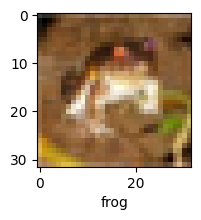

In [22]:
plot_sample(X_train,y_train,0)

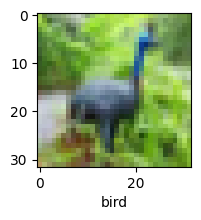

In [23]:
plot_sample(X_train,y_train, 6)

In [8]:
X_train=X_train/255
X_test=X_test/255

In [10]:
cnn=models.Sequential([

    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="sigmoid"),

])
cnn.compile(optimizer="SGD",
            loss="sparse_categorical_crossentropy",
            metrics=["accuracy"])
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
1563/1563 [==============================] - 66s 41ms/step - loss: 2.1232 - accuracy: 0.2294
Epoch 2/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.7393 - accuracy: 0.3759
Epoch 3/30
1563/1563 [==============================] - 61s 39ms/step - loss: 1.5175 - accuracy: 0.4571
Epoch 4/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.4022 - accuracy: 0.5019
Epoch 5/30
1563/1563 [==============================] - 60s 38ms/step - loss: 1.3171 - accuracy: 0.5338
Epoch 6/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.2486 - accuracy: 0.5591
Epoch 7/30
1563/1563 [==============================] - 60s 39ms/step - loss: 1.1878 - accuracy: 0.5833
Epoch 8/30
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1327 - accuracy: 0.6039
Epoch 9/30
1563/1563 [==============================] - 62s 39ms/step - loss: 1.0813 - accuracy: 0.6230
Epoch 10/30
1563/1563 [==============================] - 60s 38m

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9960 - accuracy: 0.6878


[0.9960032105445862, 0.6877999901771545]

In [12]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

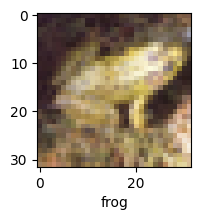

In [17]:
plot_sample(X_test,y_test,19)

In [18]:
y_pred=cnn.predict(X_test)
y_pred[:10]

313/313 [==============================] - 8s 25ms/step


array([[9.97117758e-01, 9.96017754e-01, 9.99714851e-01, 9.99967575e-01,
        9.97844636e-01, 9.99837995e-01, 9.67148423e-01, 9.21647549e-01,
        9.95581150e-01, 9.87740099e-01, 3.90249528e-02, 2.21287720e-02,
        1.61077008e-01, 1.57436468e-02, 8.30395594e-02, 4.18860823e-01,
        2.54274867e-02, 7.45544285e-02, 1.61260933e-01, 1.99230447e-01,
        3.88680845e-02, 1.63858905e-01, 3.19400668e-01, 3.93804386e-02,
        6.58170432e-02, 2.25777254e-01, 6.97638243e-02, 6.66788146e-02,
        5.33729643e-02, 1.34252664e-02, 2.88892407e-02, 1.59794167e-01],
       [9.99998748e-01, 1.00000000e+00, 9.99441803e-01, 9.58510697e-01,
        9.80304658e-01, 6.76599801e-01, 5.59492946e-01, 9.75521803e-01,
        1.00000000e+00, 9.99985397e-01, 3.70547473e-02, 4.68674721e-03,
        1.57270096e-02, 7.93566704e-02, 1.94679126e-02, 7.44757056e-02,
        2.23769192e-02, 5.75169399e-02, 1.27650738e-01, 2.41399114e-03,
        6.09720964e-03, 6.18984774e-02, 4.16936120e-03, 2.12026

In [21]:
# cnn.save('/content/drive/MyDrive/cnn_model.h5')
# model_path='/content/drive/MyDrive/cnn_model.h5'